## Importing Libraries

In [89]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import euclidean_distances

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Importing Data

In [90]:
songs_data = pd.read_csv("spotify_songs.csv")

In [91]:
songs_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [92]:
songs_data.shape

(32833, 23)

## Preprocessing

In [93]:
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [94]:
songs_data = songs_data[['track_id','track_name','danceability','energy', 'valence','tempo','acousticness']]

In [95]:
songs_data

,track_id,track_name,danceability,energy,valence,tempo,acousticness
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,0.748,0.916,0.5180,122.036,0.102000
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,0.726,0.815,0.6930,99.972,0.072400
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,0.675,0.931,0.6130,124.008,0.079400
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,0.718,0.930,0.2770,121.956,0.028700
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,0.650,0.833,0.7250,123.976,0.080300
...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,0.428,0.922,0.2100,128.170,0.076600
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,0.522,0.786,0.4000,128.041,0.001710
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,0.529,0.821,0.4360,127.989,0.108000
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,0.626,0.888,0.3080,128.008,0.007920


In [96]:
songs_data.shape

(32833, 7)

In [97]:
print(type(songs_data))  

<class 'pandas.core.frame.DataFrame'>


## Labeling Data

In [98]:
def assign_mood(row):
    if row['danceability'] > 0.7 and row['energy'] > 0.7 and row['valence'] > 0.6:
        return 'Happy/Upbeat'
    elif row['valence'] < 0.4 and row['energy'] < 0.5:
        return 'Sad'
    elif row['energy'] > 0.75 and row['tempo'] > 120:
        return 'Energetic'
    elif row['energy'] < 0.5 and row['acousticness'] > 0.5:
        return 'Calm/Chill'
    elif 0.4 < row['danceability'] < 0.6 and row['valence'] > 0.6:
        return 'Romantic'
    elif row['danceability'] > 0.7 and row['energy'] > 0.7:
        return 'Party'
    else:
        return 'Unknown'


In [99]:
songs_data['mood'] = songs_data.apply(assign_mood, axis = 1)


C:\Users\PC\AppData\Local\Temp\ipykernel_3368\1447298751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_data['mood'] = songs_data.apply(assign_mood, axis = 1)


In [100]:
songs_data['mood'].value_counts()

mood
Unknown         15237
Energetic        7701
Happy/Upbeat     3929
Sad              2519
Party            1462
Romantic         1156
Calm/Chill        829
Name: count, dtype: int64

In [101]:
songs_data.head(2)

,track_id,track_name,danceability,energy,valence,tempo,acousticness,mood
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,0.748,0.916,0.518,122.036,0.1020,Energetic
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,0.726,0.815,0.693,99.972,0.0724,Happy/Upbeat


In [102]:
known_songs = songs_data[songs_data['mood'] != 'unknown']

In [103]:
known_songs

,track_id,track_name,danceability,energy,valence,tempo,acousticness,mood
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,0.748,0.916,0.5180,122.036,0.102000,Energetic
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,0.726,0.815,0.6930,99.972,0.072400,Happy/Upbeat
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,0.675,0.931,0.6130,124.008,0.079400,Energetic
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,0.718,0.930,0.2770,121.956,0.028700,Energetic
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,0.650,0.833,0.7250,123.976,0.080300,Energetic
...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,0.428,0.922,0.2100,128.170,0.076600,Energetic
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,0.522,0.786,0.4000,128.041,0.001710,Energetic
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,0.529,0.821,0.4360,127.989,0.108000,Energetic
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,0.626,0.888,0.3080,128.008,0.007920,Energetic


In [104]:
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness']

## Splitting

In [105]:
x = known_songs[features]
y = known_songs['mood']

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [107]:
x_train, y_train = x_train[y_train != 'Unknown'], y_train[y_train != 'Unknown']
x_test, y_test = x_test[y_test != 'Unknown'], y_test[y_test != 'Unknown']


In [108]:
print(f"Unique values in y_train: {y_train.unique()}")
print(f"Unique values in y_test: {y_test.unique()}")

Unique values in y_train: ['Energetic' 'Happy/Upbeat' 'Party' 'Romantic' 'Sad' 'Calm/Chill']
Unique values in y_test: ['Energetic' 'Happy/Upbeat' 'Sad' 'Party' 'Romantic' 'Calm/Chill']


In [109]:
y_train

791         Energetic
31510       Energetic
24845    Happy/Upbeat
29098       Energetic
10030    Happy/Upbeat
             ...     
17568    Happy/Upbeat
1685        Energetic
16023        Romantic
16850           Party
15795       Energetic
Name: mood, Length: 14053, dtype: object

In [110]:
y_test

30056       Energetic
11917    Happy/Upbeat
17795    Happy/Upbeat
10428    Happy/Upbeat
17008             Sad
             ...     
7722     Happy/Upbeat
2441              Sad
6635         Romantic
4546        Energetic
11570    Happy/Upbeat
Name: mood, Length: 3543, dtype: object

## Balance Data using SMOTE

In [111]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)

# Exclude 'Unknown' before resampling
x_train_resampled, y_train_resampled = smote.fit_resample(
    x_train[y_train != 'Unknown'], y_train[y_train != 'Unknown']
)


In [112]:
import pandas as pd

# Convert y_train to a DataFrame for easier manipulation
y_train_df = pd.DataFrame(y_train_resampled, columns=['mood'])

# Count the number of 'Unknown' values in y_train
unknown_count = y_train_df['mood'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in y_train: {unknown_count}")


Number of 'Unknown' values in y_train: 0


In [113]:
y_train_df.value_counts()

mood        
Calm/Chill      6120
Energetic       6120
Happy/Upbeat    6120
Party           6120
Romantic        6120
Sad             6120
Name: count, dtype: int64

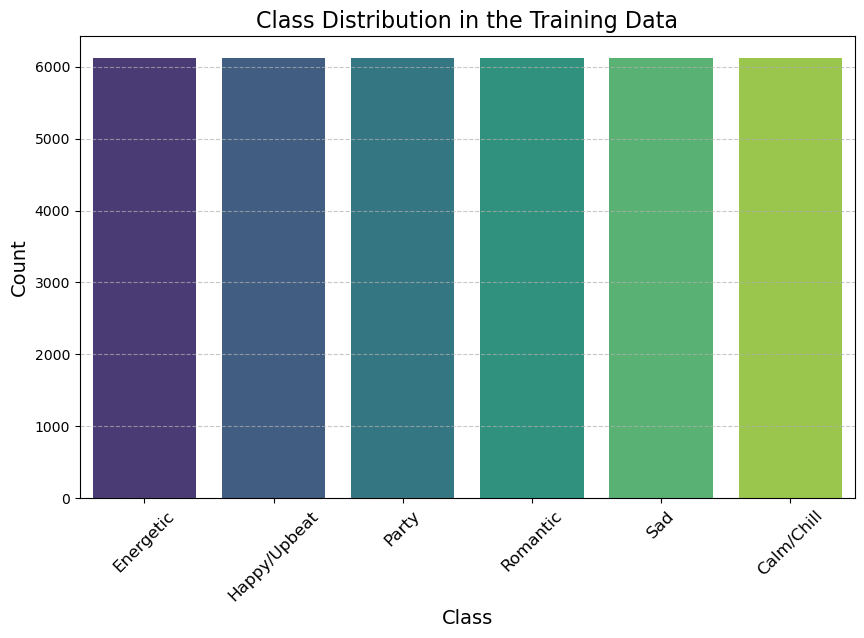

In [114]:
# Count the occurrences of each class in the 'mood' column
class_counts = y_train_df['mood'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# Customize the plot
plt.title('Class Distribution in the Training Data', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


## Building Model

In [115]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200)


In [116]:
rf_classifier.fit(x_train_resampled, y_train_df)

C:\Users\PC\AppData\Local\Temp\ipykernel_3368\3664684668.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train_resampled, y_train_df)


RandomForestClassifier(n_estimators=200)

In [117]:
y_pred  = rf_classifier.predict(x_test)

In [118]:
y_pred

array(['Energetic', 'Happy/Upbeat', 'Happy/Upbeat', ..., 'Romantic',
       'Energetic', 'Happy/Upbeat'], dtype=object)

In [119]:
accuracy_score(y_test, y_pred)

1.0

In [120]:
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Classifier Accuracy: 1.0
              precision    recall  f1-score   support

  Calm/Chill       1.00      1.00      1.00       148
   Energetic       1.00      1.00      1.00      1581
Happy/Upbeat       1.00      1.00      1.00       767
       Party       1.00      1.00      1.00       305
    Romantic       1.00      1.00      1.00       259
         Sad       1.00      1.00      1.00       483

    accuracy                           1.00      3543
   macro avg       1.00      1.00      1.00      3543
weighted avg       1.00      1.00      1.00      3543



## Dealing with Unknown Mood

In [121]:
unknown_songs = songs_data[songs_data['mood'] == 'Unknown']

In [122]:
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness']
x_unknown = unknown_songs[features]

In [123]:
x_unknown

,danceability,energy,valence,tempo,acousticness
6,0.449,0.856,0.152,112.648,0.187000
16,0.694,0.901,0.368,118.051,0.070200
17,0.678,0.747,0.516,120.002,0.039500
18,0.746,0.557,0.324,111.961,0.103000
24,0.620,0.889,0.422,110.018,0.016300
...,...,...,...,...,...
32812,0.490,0.725,0.106,126.004,0.008130
32819,0.624,0.735,0.339,127.985,0.000502
32821,0.701,0.607,0.342,127.979,0.004440
32826,0.645,0.832,0.375,112.028,0.001060


In [124]:
unknown_songs['predicted_mood'] = rf_classifier.predict(x_unknown)

C:\Users\PC\AppData\Local\Temp\ipykernel_3368\453222798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_songs['predicted_mood'] = rf_classifier.predict(x_unknown)


In [125]:
# Display the updated dataframe with predicted moods
print(unknown_songs[['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'predicted_mood']])

       danceability  energy  valence    tempo  acousticness predicted_mood
6             0.449   0.856    0.152  112.648      0.187000      Energetic
16            0.694   0.901    0.368  118.051      0.070200      Energetic
17            0.678   0.747    0.516  120.002      0.039500      Energetic
18            0.746   0.557    0.324  111.961      0.103000            Sad
24            0.620   0.889    0.422  110.018      0.016300      Energetic
...             ...     ...      ...      ...           ...            ...
32812         0.490   0.725    0.106  126.004      0.008130      Energetic
32819         0.624   0.735    0.339  127.985      0.000502      Energetic
32821         0.701   0.607    0.342  127.979      0.004440          Party
32826         0.645   0.832    0.375  112.028      0.001060      Energetic
32827         0.581   0.640    0.288  128.001      0.026600      Energetic

[15237 rows x 6 columns]


In [126]:
unknown_songs['predicted_mood'].value_counts()

predicted_mood
Romantic        4060
Energetic       4010
Happy/Upbeat    2388
Party           2046
Sad             1777
Calm/Chill       956
Name: count, dtype: int64

In [127]:
unknown_songs.loc[unknown_songs['mood'] == 'Unknown', 'mood'] = unknown_songs['predicted_mood']


In [128]:
unknown_songs.sample(3)

,track_id,track_name,danceability,energy,valence,tempo,acousticness,mood,predicted_mood
21690,1flOuDWFjEtfmWY9NYJQsr,Metal Horse,0.553,0.696,0.348,155.985,0.1780,Energetic,Energetic
5486,3WxQXufIzssKD22MqKR6cW,Gimme,0.841,0.468,0.847,107.992,0.2710,Calm/Chill,Calm/Chill
20835,6XhO1FHfsNc3ULWDePrQvk,Only You,0.852,0.554,0.847,94.985,0.0128,Happy/Upbeat,Happy/Upbeat


In [129]:
# from here prediction code starts

In [130]:
def recommend_songs(track_name):
    features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness']
    
# check if track exist 
    if track_name not in songs_data['track_name'].values:
        print("Track not found")
        return None
    
#     extracting features of played song (input song)
    track_info = songs_data[songs_data["track_name"] == track_name]
    played_song_features = track_info[features].values
    
#     check if played_song have features / exist or not
    if played_song_features.size == 0:
        print("Track features not found")
        return None
    
#     extracting all songs features
    all_songs_features = songs_data[features].values
    
#     calculating distances
    distances = euclidean_distances(all_songs_features, played_song_features)
    
#     ading distances in songs_data DataFrame
    songs_data['distances'] = distances
    
#     recommending top 5 closes songs
    recommendations = songs_data.sort_values(by= 'distances').head(5)
    
    return recommendations[['track_name', 'distances', 'mood']]
    
    

In [131]:
track_name = 'Call You Mine - Keanu Silva Remix'
recommended_songs = recommend_songs(track_name)

if recommended_songs is not None:
    print("Recommended Songs:")
    print(recommended_songs)

Recommended Songs:
                              track_name  distances       mood
3      Call You Mine - Keanu Silva Remix   0.000001  Energetic
17182                Something About You   0.081518  Energetic
31260                           Your Way   0.091933  Energetic
27559       Radio Love - Dualities Remix   0.098937  Energetic
166                How Deep Is Your Love   0.100190  Energetic


C:\Users\PC\AppData\Local\Temp\ipykernel_3368\230341467.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_data['distances'] = distances


C:\Users\PC\AppData\Local\Temp\ipykernel_3368\2409712517.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(known_songs[feature], label='Known', color='blue', shade=True)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\AppData\Local\Temp\ipykernel_3368\2409712517.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(unknown_songs[feature], label='Unknown', color='red', shade=True)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a f

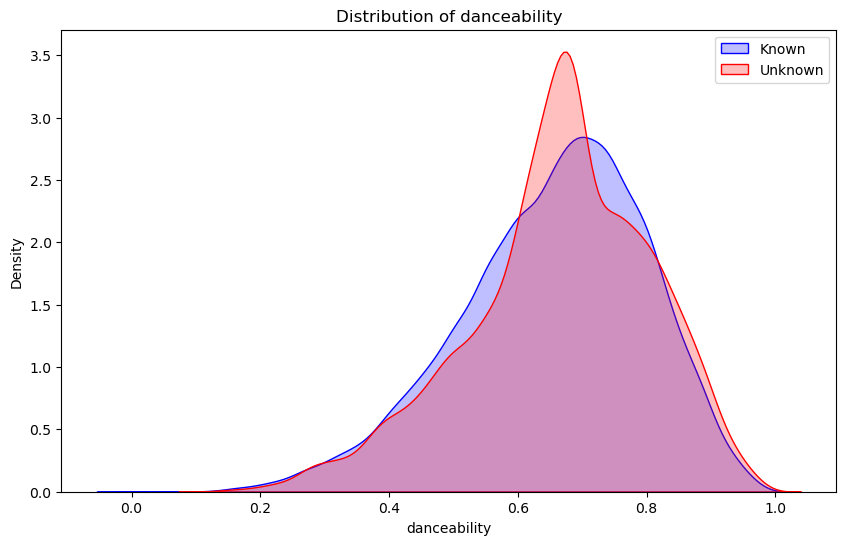

C:\Users\PC\AppData\Local\Temp\ipykernel_3368\2409712517.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(known_songs[feature], label='Known', color='blue', shade=True)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\AppData\Local\Temp\ipykernel_3368\2409712517.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(unknown_songs[feature], label='Unknown', color='red', shade=True)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a f

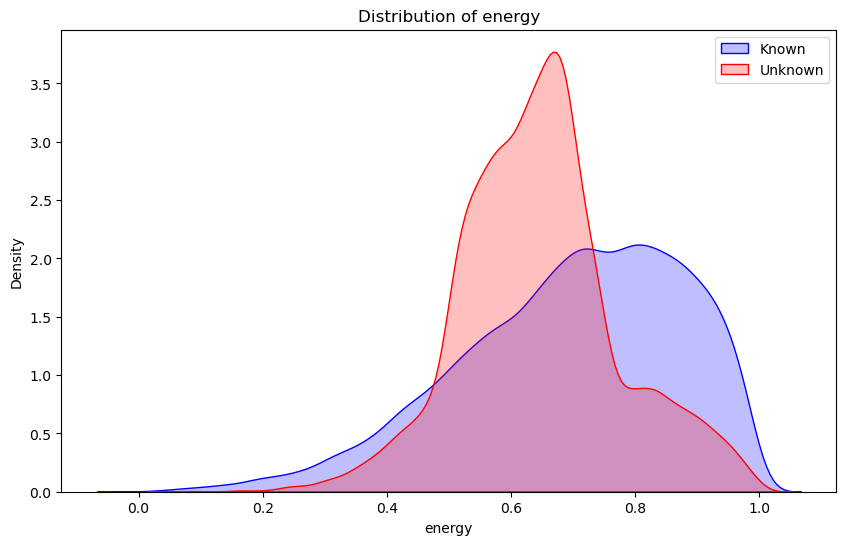

C:\Users\PC\AppData\Local\Temp\ipykernel_3368\2409712517.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(known_songs[feature], label='Known', color='blue', shade=True)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\AppData\Local\Temp\ipykernel_3368\2409712517.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(unknown_songs[feature], label='Unknown', color='red', shade=True)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a f

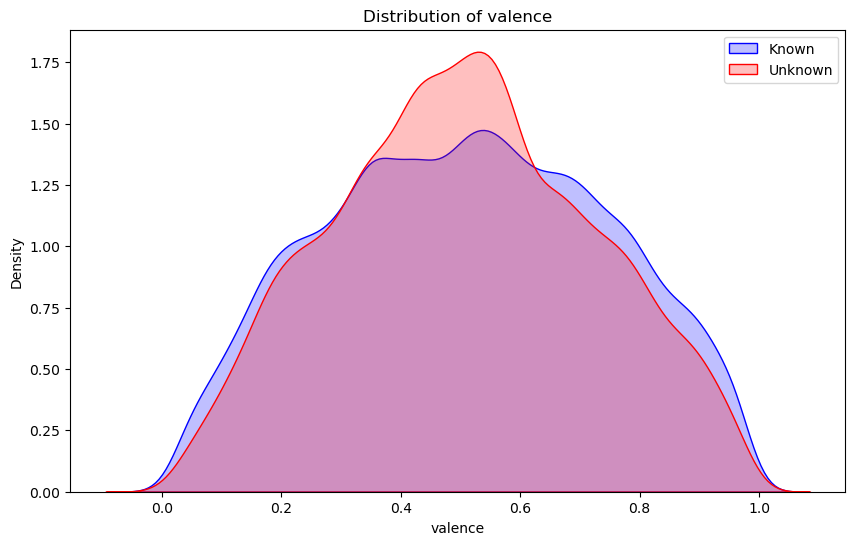

C:\Users\PC\AppData\Local\Temp\ipykernel_3368\2409712517.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(known_songs[feature], label='Known', color='blue', shade=True)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\AppData\Local\Temp\ipykernel_3368\2409712517.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(unknown_songs[feature], label='Unknown', color='red', shade=True)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a f

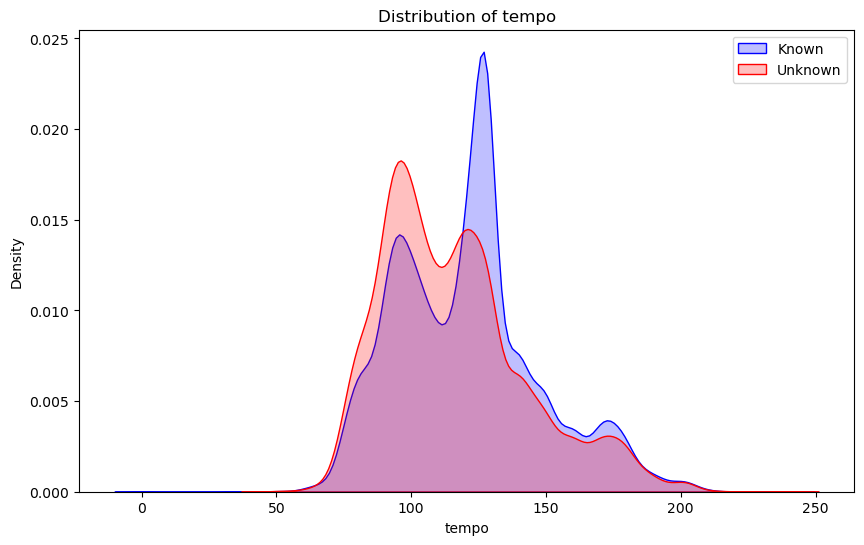

C:\Users\PC\AppData\Local\Temp\ipykernel_3368\2409712517.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(known_songs[feature], label='Known', color='blue', shade=True)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\AppData\Local\Temp\ipykernel_3368\2409712517.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(unknown_songs[feature], label='Unknown', color='red', shade=True)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a f

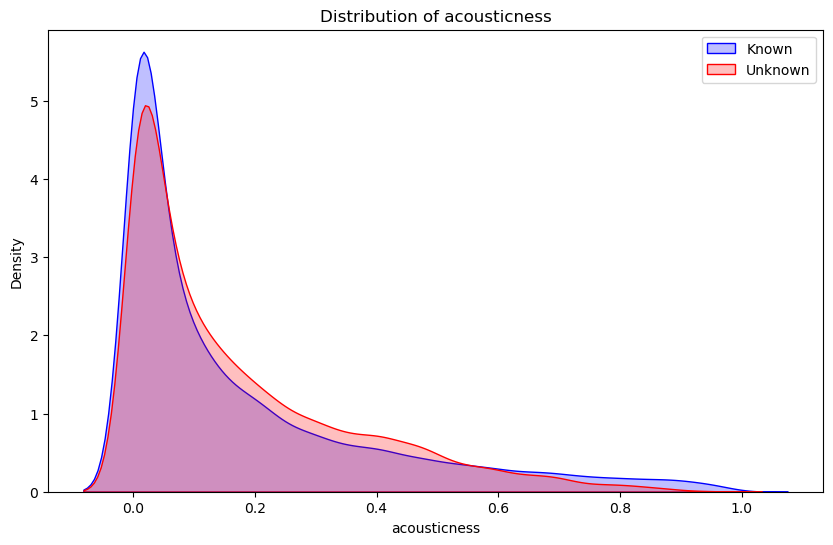

In [132]:
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(known_songs[feature], label='Known', color='blue', shade=True)
    sns.kdeplot(unknown_songs[feature], label='Unknown', color='red', shade=True)
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()
